# **ML3-Educational-YouTube-Video-Classifier**
Identificazione (classificazione) di materiale multimediale (es. Video Youtube, PDF) adatto a corsi didattici online con tecniche di Computer Vision e Deep Learning.




In [0]:
import pandas as pd
import numpy as np
from collections import OrderedDict 

In [3]:
url = 'https://raw.githubusercontent.com/GiuliaSim/ML3-Educational-YouTube-Video-Classifier/master/data/all_dataset.csv'
data = pd.read_csv(url)
data

,videoId,title,author,viewCount,likes,dislikes,tags,lengthSeconds,IsEducational,brightness,...,mfcc_coeff_5,mfcc_coeff_6,mfcc_coeff_7,mfcc_coeff_8,mfcc_coeff_9,mfcc_coeff_10,mfcc_coeff_11,mfcc_coeff_12,mfcc_coeff_13,word_frequency
0,aircAruvnKk,But what *is* a Neural Network? | Deep learnin...,3Blue1Brown,3763560,104543.0,948.0,"three brown one blue,3 brown 1 blue,neural net...",1153.0,True,15.413637,...,0.777029,0.664881,-1.071152,-0.824502,-0.293068,-0.029381,-0.489400,-0.249273,0.121967,"[layer:31,network:20,weights:17,pixels:13,numb..."
1,_QdPW8JrYzQ,This is what happens when you reply to spam em...,TED,36813466,774970.0,23242.0,"TED Talk,TED Talks,James Veitch,spam,humor,comedy",589.0,False,138.247674,...,0.123163,-0.297527,-0.175742,0.439673,-0.237210,0.521452,0.032813,-0.320171,-0.205916,"[said:20,Solomon:6,much:6,get:5,email:5,good:5..."
2,OWJCfOvochA,Quantum Computing Expert Explains One Concept ...,WIRED,3214954,91094.0,3195.0,"5 levels,quantum computing,quantum,quantum mec...",1167.0,False,119.708402,...,0.470501,-1.148816,-0.862484,0.088011,0.305904,0.254533,-0.515356,0.024046,0.078378,"[really:11,computer:9,quantum:7,computers:7,ne..."
3,ZS_kXvOeQ5Y,SQL vs NoSQL or MySQL vs MongoDB,Academind,326956,6138.0,154.0,"sql,nosql,mongodb,mysql,sql vs nosql,mysql vs ...",1290.0,True,233.893625,...,0.684950,0.063044,-0.331002,0.202406,0.347539,0.022286,0.104682,0.221012,0.046240,"[sequel:51,data:50,user:32,database:26,table:2..."
4,x7qPAY9JqE4,Steve Jobs Introducing The iPhone At MacWorld ...,superapple4ever,5628261,51418.0,3424.0,"iPhone,1st,Gen,2G,ATT,MacWorld 2007,Steve Jobs...",841.0,False,47.139331,...,-0.050641,-0.028761,-0.052698,0.078956,-0.167047,0.292132,0.089148,0.173991,0.154967,"[got:19,iPod:12,right:11,user:10,phone:9,going..."
5,9AThycGCakk,Life Lessons From 100-Year-Olds,LifeHunters,12514771,441604.0,4697.0,"christmas,life lessons,life skills,100 years,1...",810.0,False,120.343923,...,-0.086419,-0.510609,-0.616030,0.464762,0.072173,0.107068,-0.166255,-0.162294,0.264036,"['ve:10,always:8,think:6,keep:5,thing:5,people..."
6,-ruC5A9EzzE,"The 10,958 Problem - Numberphile",Numberphile,1767287,31176.0,1506.0,"numberphile,numbers",504.0,True,157.919245,...,1.224100,-0.397601,-0.771834,-0.129718,0.293681,0.334350,0.135817,0.520536,0.088069,"[number:12,give:7,digit:7,using:7,think:6,woul..."
7,Lj1a8rdX6DU,What Engineers Found When They Tore Apart Tesl...,Bloomberg Technology,6174506,47195.0,17365.0,Bloomberg,302.0,False,95.719624,...,0.666733,-0.008979,-0.354516,0.555122,-0.364322,0.261314,-0.058591,0.008264,0.281801,"[motor:7,Tesla:4,Monroe:4,model:4,gives:4,expe..."
8,Zh3Yz3PiXZw,Alternative Math | Short Film,Ideaman,5200801,103077.0,4840.0,"short film,alternative facts,math,education,2+...",547.0,False,95.161313,...,-0.342984,0.606035,-0.002361,0.278011,0.038038,0.007455,-0.291416,-0.106274,0.192669,"[stupid:4,know:3,like:2,addition:2,learn:2,mis..."
9,bNpx7gpSqbY,The single biggest reason why start-ups succee...,TED,2199946,41382.0,942.0,"TEDTalk,TEDTalks,TED Talk,TED Talks,TED,Bill G...",401.0,False,110.693330,...,-0.403038,0.024596,-0.191218,-0.481068,0.105631,0.291737,0.126527,-0.149984,-0.011686,"[companies:15,idea:12,company:10,really:9,timi..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 32 columns):
videoId                        424 non-null object
title                          424 non-null object
author                         424 non-null object
viewCount                      424 non-null int64
likes                          423 non-null float64
dislikes                       423 non-null float64
tags                           398 non-null object
lengthSeconds                  424 non-null float64
IsEducational                  424 non-null bool
brightness                     424 non-null float64
entropy                        424 non-null float64
text_density                   424 non-null float64
subject_mask                   424 non-null float64
subject_contrast               424 non-null float64
background_color_simplicity    424 non-null float64
voice_frequencies              424 non-null float64
non_voice_frequencies          424 non-null float64
mfcc_shape          

In [5]:
data['IsEducational'].value_counts()

False    240
True     184
Name: IsEducational, dtype: int64

In [6]:
data.columns

Index(['videoId', 'title', 'author', 'viewCount', 'likes', 'dislikes', 'tags',
       'lengthSeconds', 'IsEducational', 'brightness', 'entropy',
       'text_density', 'subject_mask', 'subject_contrast',
       'background_color_simplicity', 'voice_frequencies',
       'non_voice_frequencies', 'mfcc_shape', 'mfcc_coeff_1', 'mfcc_coeff_2',
       'mfcc_coeff_3', 'mfcc_coeff_4', 'mfcc_coeff_5', 'mfcc_coeff_6',
       'mfcc_coeff_7', 'mfcc_coeff_8', 'mfcc_coeff_9', 'mfcc_coeff_10',
       'mfcc_coeff_11', 'mfcc_coeff_12', 'mfcc_coeff_13', 'word_frequency'],
      dtype='object')

## **Aesthetic-visual features**


*   ***Brightness*** - Rappresenta la luminosità media del video.
*   ***Entropy*** -  Per misurare se un'immagine non è interessante o vivace, calcoleremo l'entropia dell'intensità dei pixel presenti nell'immagine. Saremo in grado di distinguere un'immagine come poco interessante se ha poca o nessuna variazione nella sua intensità di pixel e bassa entropia, in contrasto con un'immagine vivace che ha molti valori di intensità di pixel diversi e un'alta entropia.
*   ***Text Density*** - Il rapporto medio tra la dimensione totale dell’immagine e le aree (blocks) di testo del frame. Per alcune tipologie di video didattici questa feature avrà un valore molto alto (per esempio, video puramente con slides o con lavagne). 
*   ***Subjet Mask*** - La regione del soggetto tende ad avere una salienza più alta rispetto allo sfondo, il che significa che le mappe di salienza possono essere utilizzate per prevedere il soggetto e lo sfondo corrispondenti ai pixel dell'immagine. 
*   ***Subject Contrast*** -  L'illuminazione del soggetto e dello sfondo forniscono un contrasto importante. Si evidenzia l'importanza di avere una notevole distinzione nella luminosità tra soggetto e sfondo.  Nella sua ricerca, le immagini più esteticamente piacevoli sono quelle con un alto contrasto soggetto / sfondo.
*   ***Background Color Simplicity*** - Quando si considerano gli sfondi nelle immagini, è importante tenere conto della distribuzione del colore. Questa funzione valuta l'area di sfondo per ottenere la sua semplicità di colore. Le immagini che presentano uno sfondo con un'elevata complessità cromatica concentreranno un'elevata attenzione, distraendo così l'osservatore dal soggetto che l'immagine intende evidenziare.





In [0]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [8]:
data_edu = data[data['IsEducational']==True]
data_not_edu = data[data['IsEducational']==False]
nBins = 10
num_edu, num_notEdu = len(data_edu),len(data_not_edu)
num_edu, num_notEdu

(184, 240)

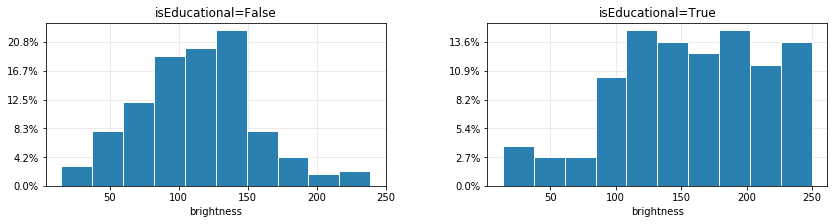

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)




ax = plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
#plt.grid(b=True, color='r')

plt.hist(data_not_edu['brightness'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('brightness')

ax =plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')

plt.hist(data_edu['brightness'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('brightness')


plt.show()

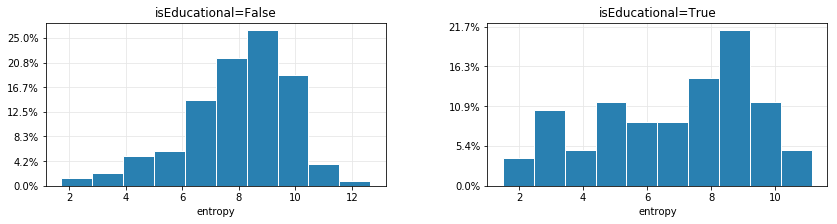

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['entropy'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('entropy')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['entropy'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('entropy')

plt.show()

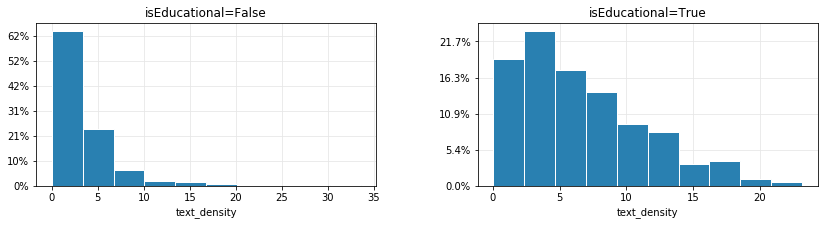

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['text_density'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('text_density')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['text_density'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('text_density')

plt.show()

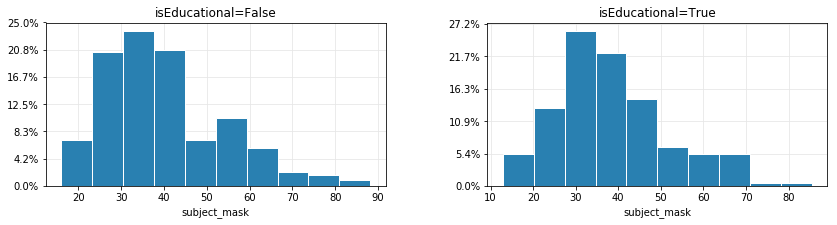

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['subject_mask'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('subject_mask')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['subject_mask'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('subject_mask')

plt.show()

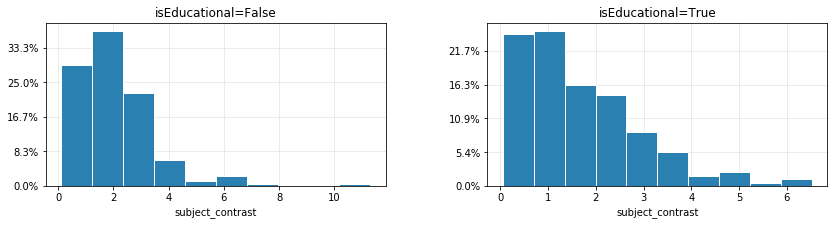

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['subject_contrast'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('subject_contrast')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['subject_contrast'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('subject_contrast')

plt.show()

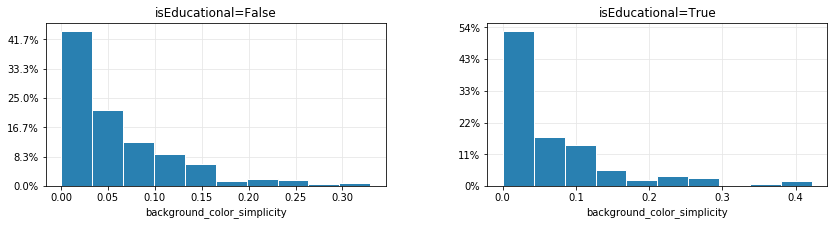

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['background_color_simplicity'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('background_color_simplicity')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['background_color_simplicity'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('background_color_simplicity')

plt.show()

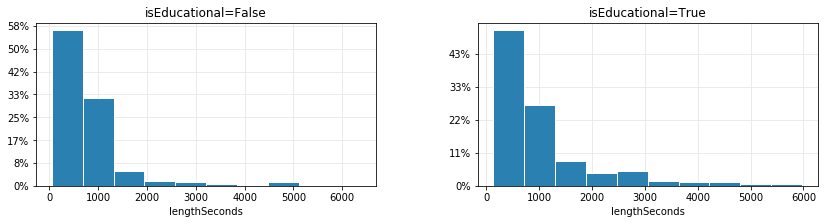

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['lengthSeconds'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('lengthSeconds')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['lengthSeconds'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('lengthSeconds')

plt.show()

## **Audio features**


*   ***Voice frequencies*** - Ampiezza media delle frequenze della voce umana. 
*   ***Non voice frequencies*** - Ampiezza media delle frequenze non vocali.
*   ***Mel-frequency cepstral coefficients (MFCC)*** - Rappresentano caratteristiche timbriche di un file audio. Gli MFCC si sono dimostrati utili per molte attività di elaborazione audio e musicale. Forniscono una rappresentazione compatta dell'inviluppo spettrale e sono anche una rappresentazione musicalmente significativa e sono usati per catturare scene acustiche. 
*   ***RelevantWordsCount*** - Rappresenta la quantià di parole di tipo didattico presenti in un video


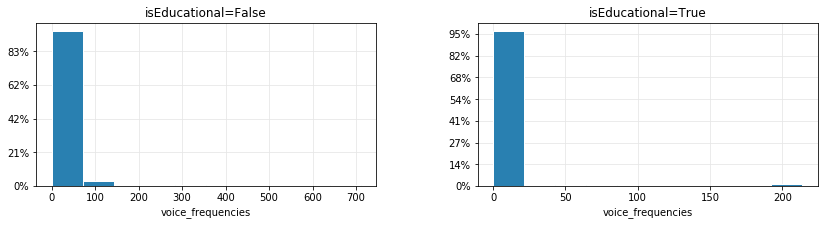

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['voice_frequencies'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('voice_frequencies')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['voice_frequencies'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('voice_frequencies')

plt.show()

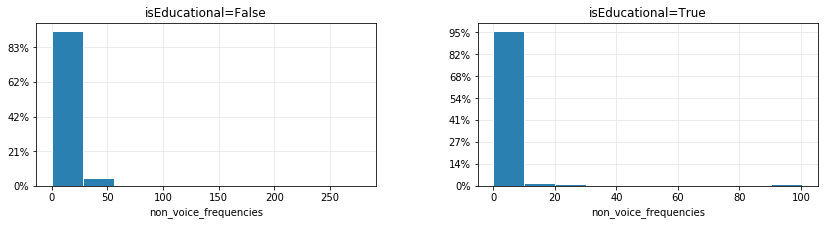

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['non_voice_frequencies'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('non_voice_frequencies')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['non_voice_frequencies'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('non_voice_frequencies')

plt.show()

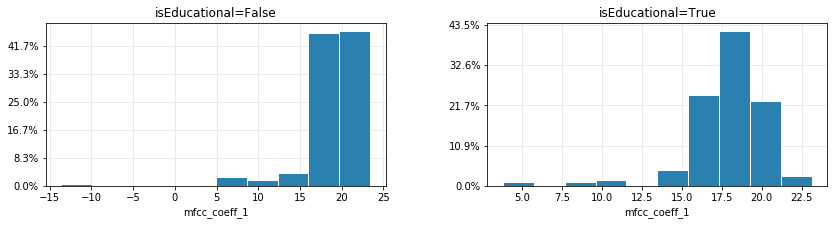

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['mfcc_coeff_1'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('mfcc_coeff_1')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['mfcc_coeff_1'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('mfcc_coeff_1')

plt.show()

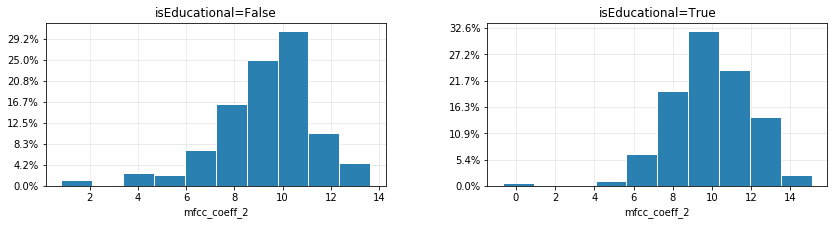

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['mfcc_coeff_2'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('mfcc_coeff_2')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['mfcc_coeff_2'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('mfcc_coeff_2')

plt.show()

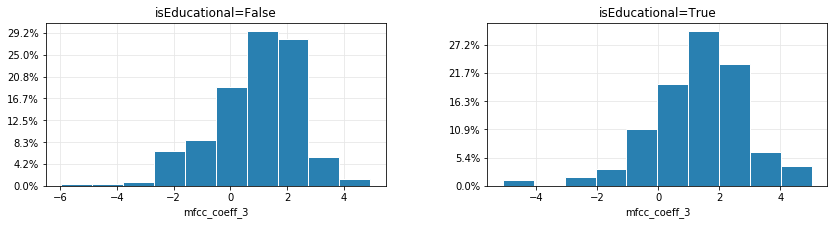

In [0]:
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['mfcc_coeff_3'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('mfcc_coeff_3')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['mfcc_coeff_3'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('mfcc_coeff_3')

plt.show()

## **Audio Text Analysis**

In [0]:
msk = np.random.rand(len(data)) < 0.8
training_set, test_set = data[msk], data[~msk]

In [0]:
def getFrequentWords(relWords):
  d = {}

  for b in relWords:

    i = b.split(':')

    if(len(i)==2 and i[1].isdigit() and len(i[0])>3 and int(i[1])>10):
      if(i[0] in d):
        d[i[0]]= d[i[0]]+1
      else:
        d[i[0]] = 1

  return d


In [11]:
#relWords =[y for x in training_set[training_set['IsEducational']==True]['word_frequency'].str[1:-1].str.replace(':[0-9]*', '').str.split(",") for y in x]
##Elimino i duplicati
#relWords = list(set(relWords))
#relWords = list(filter(None, relWords)) 
#relWords[:10]

relWords =[y for x in training_set[training_set['IsEducational']==True]['word_frequency'].str[1:-1].str.split(",") for y in x]


relWords=getFrequentWords(relWords)
relWords=list(relWords.keys())
relWords[:10]

['layer',
 'network',
 'weights',
 'pixels',
 'number',
 'image',
 'might',
 'want',
 'specific',
 'next']

In [12]:
len(relWords)

641

In [0]:
import re
import difflib
import itertools

# min similarity ratio between strings
def sim(str_1, str_2):
    return difflib.SequenceMatcher(None, str_1, str_2).ratio()

THRESHOLD = 0.65

def isEducational(x):
    for word in relWords:
        if(sim(x.lower(), word.lower()) > THRESHOLD):
            return True
    return False

def countEducationalTags(words):
    counter = 0
    words = [re.sub(r':[0-9]*', '',w) for w in words[1:-1].split(",")]
    #Elimino i duplicati
    words = list(set(words))
    words = list(filter(None, words))
    for word in words:
        if(isEducational(word)):
            counter = counter + 1
    return counter

In [15]:
data["RelevantWordsCount"] = data["word_frequency"].apply(lambda words: countEducationalTags(words))
data[['videoId', 'RelevantWordsCount', 'IsEducational']][:10]


,videoId,RelevantWordsCount,IsEducational
0,aircAruvnKk,558,True
1,_QdPW8JrYzQ,215,False
2,OWJCfOvochA,199,False
3,ZS_kXvOeQ5Y,459,True
4,x7qPAY9JqE4,325,False
5,9AThycGCakk,239,False
6,-ruC5A9EzzE,158,True
7,Lj1a8rdX6DU,146,False
8,Zh3Yz3PiXZw,90,False
9,bNpx7gpSqbY,278,False


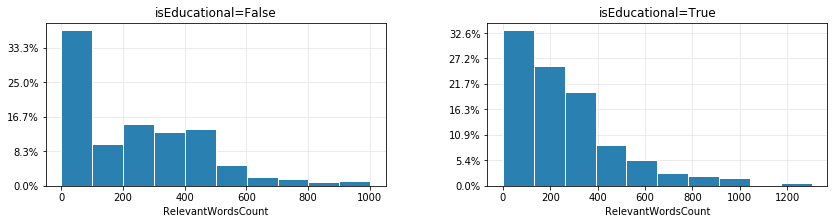

In [16]:
data_edu = data[data['IsEducational']==True]
data_not_edu = data[data['IsEducational']==False]
%matplotlib inline
fig = plt.figure(num=2,figsize=(14,3))
grid = plt.GridSpec(ncols=2, nrows=1, wspace=0.3)

ax=plt.subplot(grid[0])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_not_edu['RelevantWordsCount'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_notEdu))
plt.title('isEducational=False')
plt.xlabel('RelevantWordsCount')

ax=plt.subplot(grid[1])
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
plt.hist(data_edu['RelevantWordsCount'], nBins, histtype='bar', facecolor="#2980B1", edgecolor='w')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=num_edu))
plt.title('isEducational=True')
plt.xlabel('RelevantWordsCount')

plt.show()

## **Classifier**

In [17]:
# Importing libraries for building the neural network
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

Using TensorFlow backend.


In [0]:
prediction_var = ['brightness', 'entropy', 'text_density', 
       'subject_mask','subject_contrast', 'background_color_simplicity', 
       'voice_frequencies', 'non_voice_frequencies', 
       'mfcc_coeff_1', 'mfcc_coeff_2', 'mfcc_coeff_3', 
       'mfcc_coeff_4', 'mfcc_coeff_5', 'mfcc_coeff_6',
       'mfcc_coeff_7', 'mfcc_coeff_8', 'mfcc_coeff_9', 
       'mfcc_coeff_10', 'mfcc_coeff_11', 'mfcc_coeff_12', 'mfcc_coeff_13','RelevantWordsCount']
X = data[prediction_var].values
Y = data.IsEducational.values
input_dimension = len(prediction_var)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0969281  0.06759082 0.0773577  0.03839772 0.04002609 0.0379643
 0.04454234 0.04052558 0.05180916 0.0290019  0.02618516 0.03830793
 0.03680738 0.04309871 0.0505514  0.03312602 0.03698962 0.04899319
 0.04164302 0.03804015 0.03718378 0.04492996]


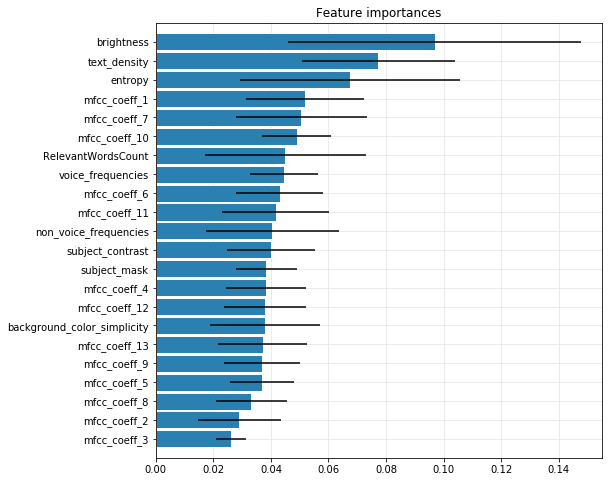

In [0]:
# FEATURE ANALYSIS
model = ExtraTreesClassifier()
model.fit(X, Y)
importances = model.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)

# Rearrange feature names so they match the sorted feature importances
names = [prediction_var[i] for i in indices]

# Plot the feature importances of the forest
#plt.figure()
fig, ax = plt.subplots(figsize=(8, 8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],height=0.9,
       color="#2980B1", xerr=std[indices], align="center",  edgecolor='w')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#E6E6E6', linestyle='solid')
ax.xaxis.grid(color='#E6E6E6', linestyle='solid')
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), names)
plt.ylim([-1, X.shape[1]])
plt.show()


In [0]:
# Baseline model for the neural network. We choose a hidden layer of 10 neurons. 
# The lesser number of neurons helps to eliminate the redundancies in the data 
# and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(64, input_dim=input_dimension, activation='sigmoid'))
    # Con la tecnica di regolarizzaione del Dropout cerco di limitare l'overfitting, 
    # Ad ogni iterazione il 30% dei nodi viene "disabilitato".
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation=tf.nn.sigmoid))
    
    #optimizer = keras.optimizers.SGD(lr=0.01)
    
    # Il parametro decay corrisponde al decay rate della Inverse time decay
    # Il parametro momentum fa riferimento alla tecnica omonima.
    #optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.975, nesterov=False
    
    # Impieghiamo una variazione dello SGD chiamata Adam, molto popolare nel DL.
    # Combina i benefici di altri approcci (es. AdaGrad e RMSProp).
    # Per approfondimenti: 
    # Adam: A Method for Stochastic Optimization https://arxiv.org/abs/1412.6980v8
    optimizer = 'adam'
    
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Elapsed time (learning): 00:01:35
Results: 77.10% (3.33%)


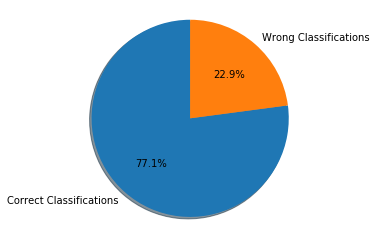

In [20]:
# evaluate model with standardized dataset
start_time = time.time()
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)

# tempo computazione
elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)

print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Correct Classifications',  'Wrong Classifications'
sizes = [results.mean()*100, (100-results.mean()*100)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Elapsed time (learning): 00:02:00
Results: 78.08% (5.13%)


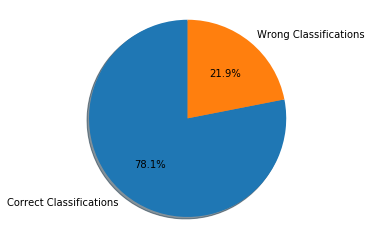

In [0]:
# Evaluate model using standardized dataset. 
start_time = time.time()
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)

# tempo computazione
elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)

print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Correct Classifications',  'Wrong Classifications'
sizes = [results.mean()*100, (100-results.mean()*100)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()